In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data.shape

(1470, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


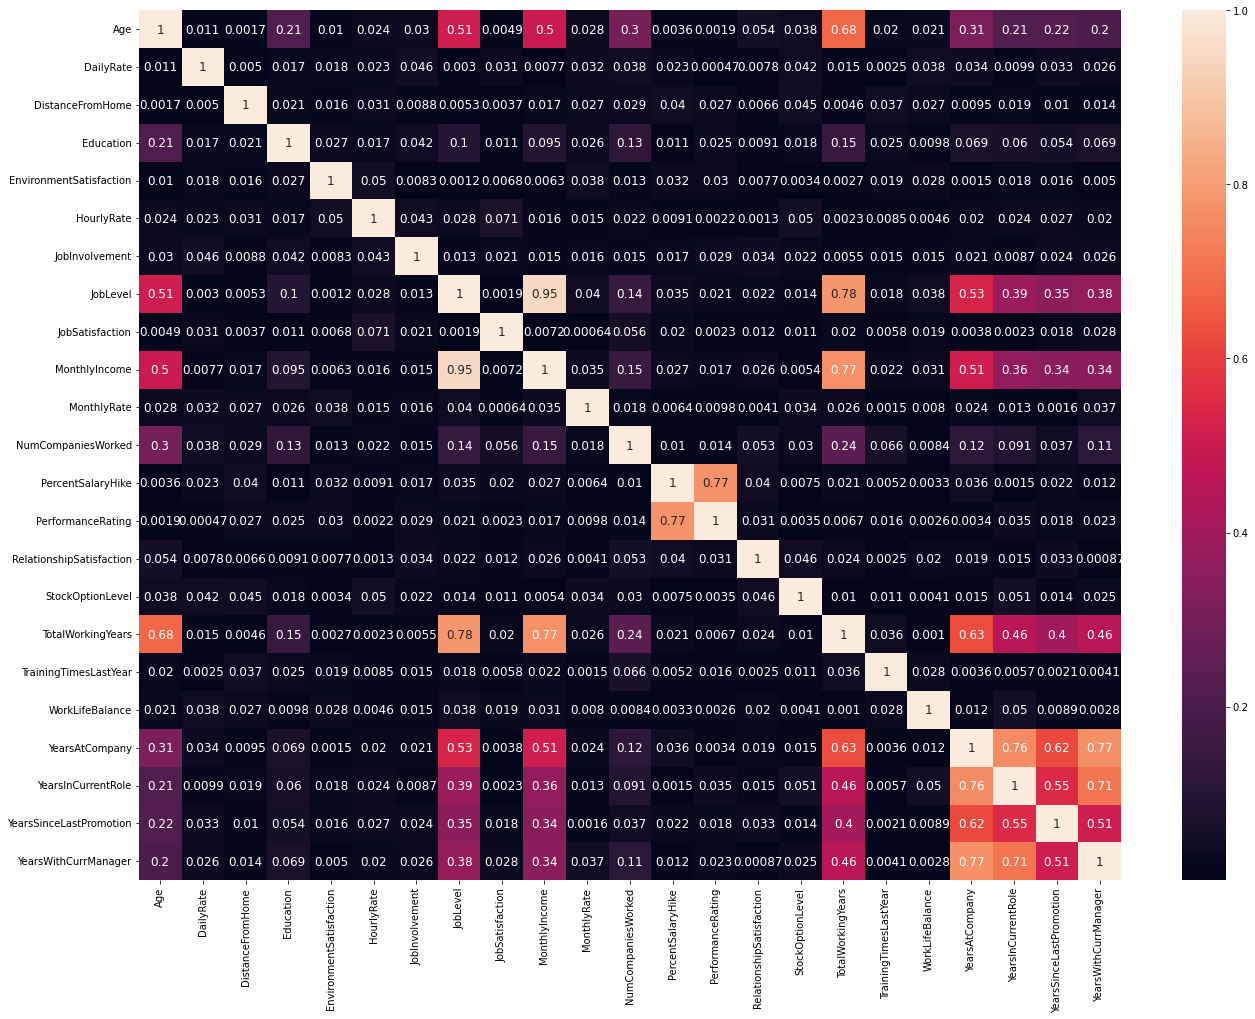

In [8]:
data_corr = data.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

In [9]:
data_cont = data.select_dtypes(exclude = ['object'] )

data_cont

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [10]:
count = 1
for x in data_cont:
    print(f'{count}. {x}: {data_cont[x].nunique()}')
    print(f'{data_cont[x].value_counts()}', end = '\n----------\n\n' )    
    count += 1

1. Age: 43
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
----------

2. DailyRate: 886
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
----------

3. DistanceFromHome: 29
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64
----------

4. Education: 5
3   

In [11]:
# Categorical Data

data_cat = data.select_dtypes(include = ['object'] )

data_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


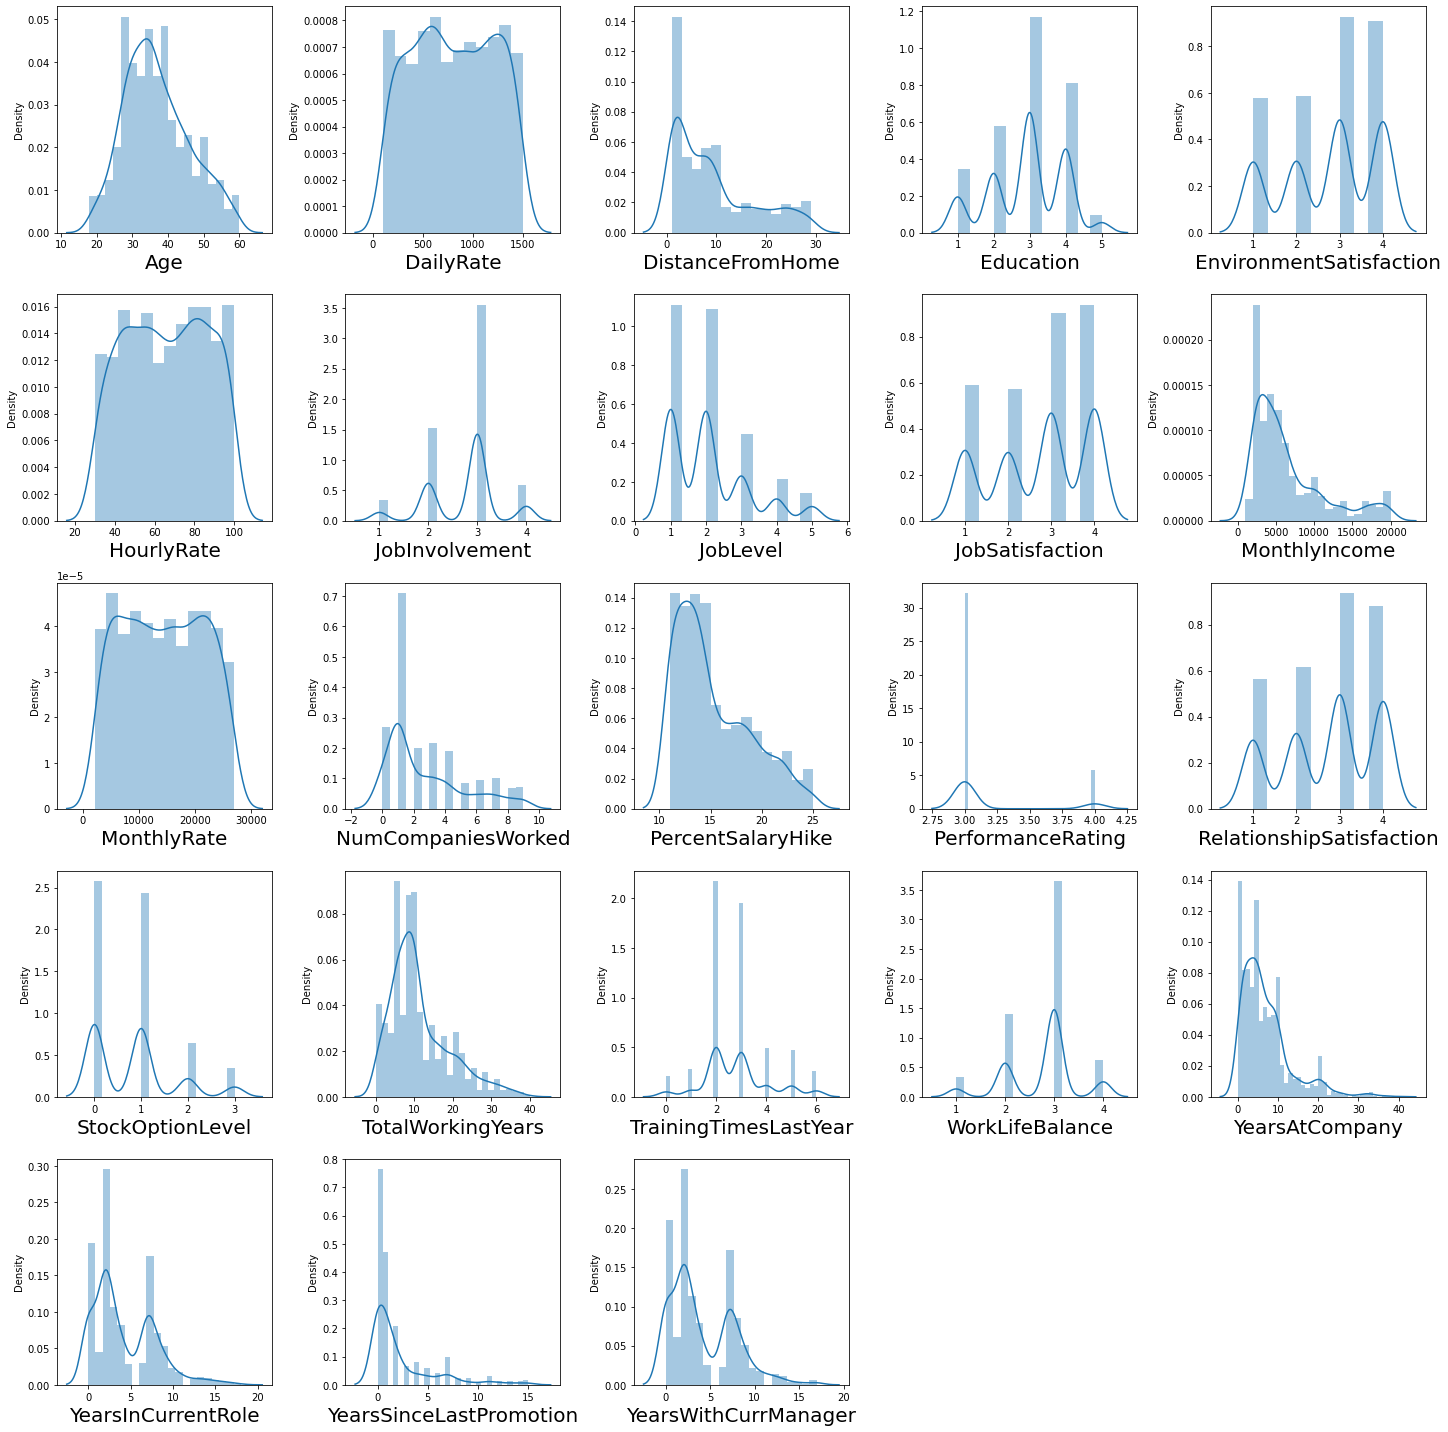

In [12]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in data_cont:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(data_cont[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [13]:
x = data.drop('Attrition', axis=1)
y = data.Attrition

In [14]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

In [15]:
dum_BusinessTravel = pd.get_dummies(data['BusinessTravel'],
                                    prefix ='BusinessTravel')
dum_Department = pd.get_dummies(data['Department'],
                                prefix ='Department')
dum_EducationField = pd.get_dummies(data['EducationField'],
                                    prefix ='EducationField')
dum_Gender = pd.get_dummies(data['Gender'],
                            prefix ='Gender', drop_first = True)
dum_JobRole = pd.get_dummies(data['JobRole'],
                             prefix ='JobRole')
dum_MaritalStatus = pd.get_dummies(data['MaritalStatus'],
                                   prefix ='MaritalStatus')
dum_OverTime = pd.get_dummies(data['OverTime'],
                              prefix ='OverTime', drop_first = True)
# Adding these dummy variable to input X
X = pd.concat([x, dum_BusinessTravel, dum_Department,
               dum_EducationField, dum_Gender, dum_JobRole,
               dum_MaritalStatus, dum_OverTime], axis = 1)
# Removing the categorical data
X.drop(['BusinessTravel', 'Department', 'EducationField',
        'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
        axis = 1, inplace = True)
 
print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


In [16]:

X.skew().sort_values(ascending = False)

EducationField_Human Resources       7.181112
JobRole_Human Resources              5.035637
Department_Human Resources           4.518824
JobRole_Research Director            3.932443
EducationField_Other                 3.875119
JobRole_Sales Representative         3.847192
JobRole_Manager                      3.392611
JobRole_Healthcare Representative    2.887251
EducationField_Technical Degree      2.872604
JobRole_Manufacturing Director       2.694844
BusinessTravel_Non-Travel            2.632066
EducationField_Marketing             2.525783
YearsSinceLastPromotion              1.984290
PerformanceRating                    1.921883
YearsAtCompany                       1.764529
JobRole_Laboratory Technician        1.701604
BusinessTravel_Travel_Frequently     1.595067
JobRole_Research Scientist           1.512214
MonthlyIncome                        1.369817
JobRole_Sales Executive              1.340834
MaritalStatus_Divorced               1.336093
TotalWorkingYears                 

In [17]:
from sklearn.preprocessing import power_transform

x_new = power_transform(X)

In [18]:
pd.DataFrame(x_new).skew().sort_values(ascending = False)

29    7.181112
37    5.035637
26    4.518824
41    3.932443
33    3.875119
44    3.847192
39    3.392611
36    2.887251
34    2.872604
40    2.694844
23    2.632066
31    2.525783
13    1.921883
38    1.701604
24    1.595067
42    1.512214
43    1.340834
45    1.336093
48    0.964489
28    0.856158
32    0.794118
47    0.773874
30    0.356919
21    0.212129
46    0.169484
12    0.116250
7     0.103624
15    0.087019
17    0.058058
11    0.014814
9     0.000000
2    -0.007468
0    -0.007603
19   -0.008683
16   -0.010653
18   -0.012286
6    -0.020365
20   -0.060849
22   -0.067565
3    -0.099881
5    -0.106461
10   -0.184087
14   -0.193634
1    -0.196160
4    -0.205395
8    -0.212815
35   -0.408665
27   -0.646936
25   -0.923992
dtype: float64

In [19]:
x = pd.DataFrame(x_new, columns = X.columns)

In [20]:
x.skew().sort_values(ascending = False)

EducationField_Human Resources       7.181112
JobRole_Human Resources              5.035637
Department_Human Resources           4.518824
JobRole_Research Director            3.932443
EducationField_Other                 3.875119
JobRole_Sales Representative         3.847192
JobRole_Manager                      3.392611
JobRole_Healthcare Representative    2.887251
EducationField_Technical Degree      2.872604
JobRole_Manufacturing Director       2.694844
BusinessTravel_Non-Travel            2.632066
EducationField_Marketing             2.525783
PerformanceRating                    1.921883
JobRole_Laboratory Technician        1.701604
BusinessTravel_Travel_Frequently     1.595067
JobRole_Research Scientist           1.512214
JobRole_Sales Executive              1.340834
MaritalStatus_Divorced               1.336093
OverTime_Yes                         0.964489
Department_Sales                     0.856158
EducationField_Medical               0.794118
MaritalStatus_Single              

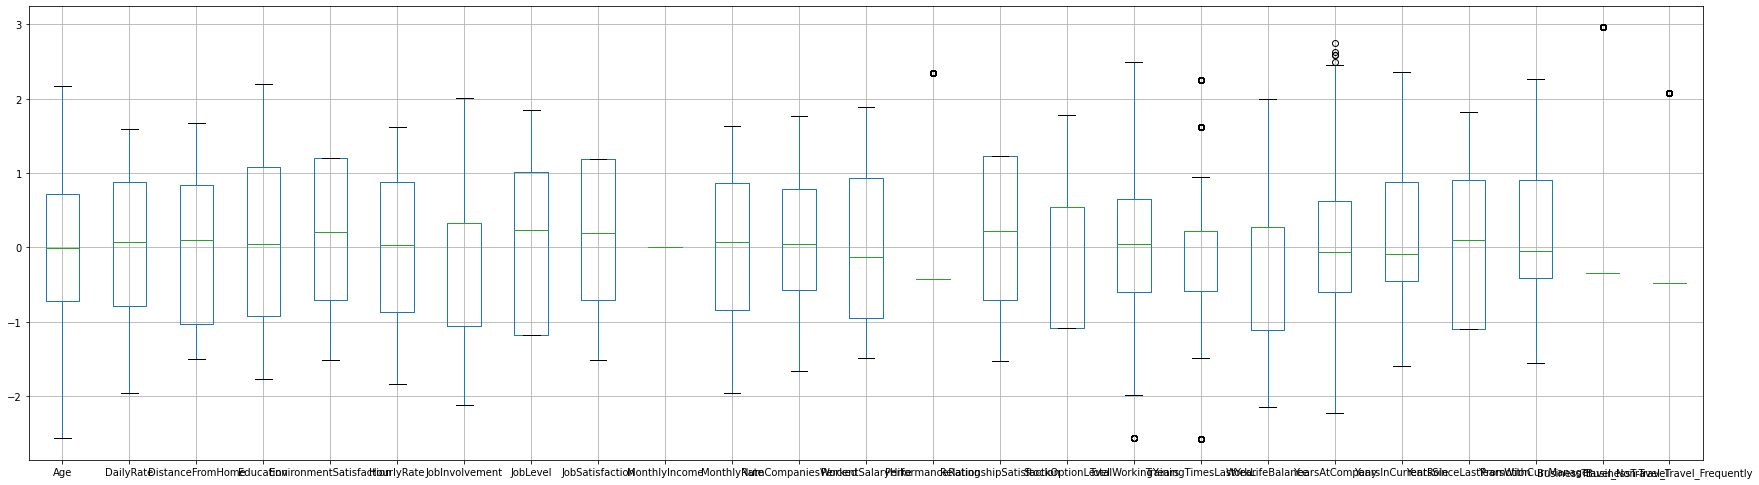

In [21]:
# checking Outliers

x.iloc[:,0:25].boxplot(figsize = (30,10))
plt.subplots_adjust(bottom = 0.25)
plt.show()

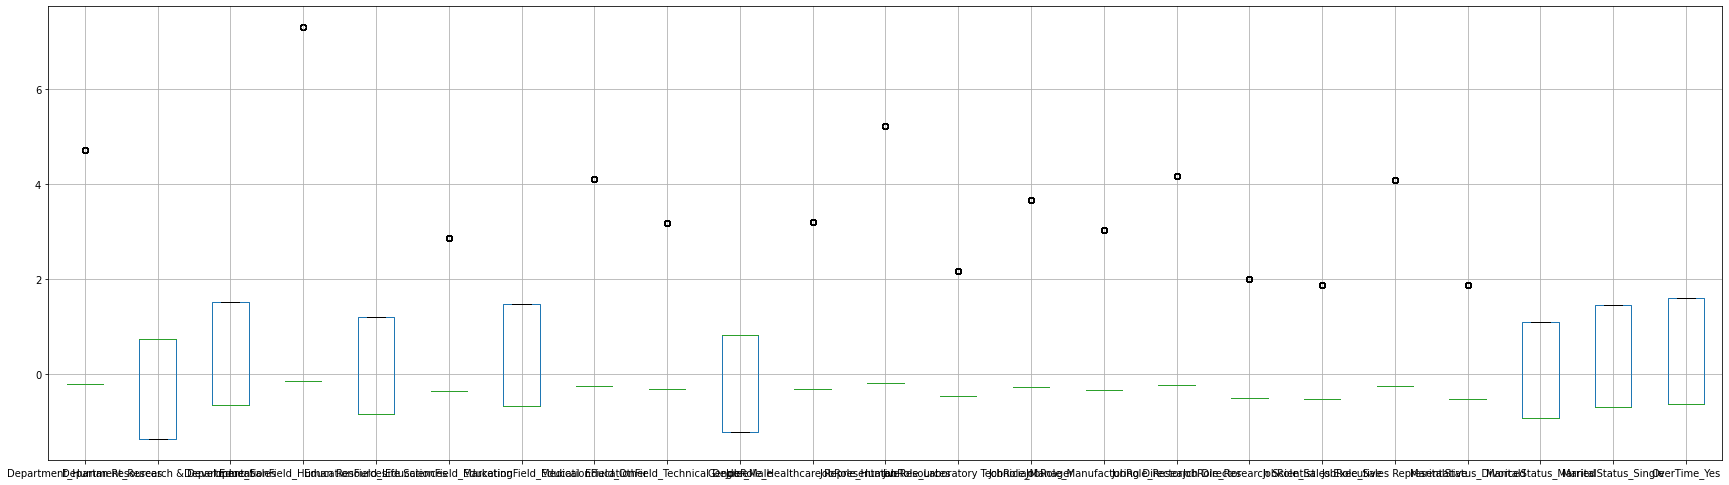

In [22]:
# checking Outliers

x.iloc[:,26:].boxplot(figsize = (30,10))
plt.subplots_adjust(bottom = 0.25)
plt.show()

In [28]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

Age                                   True
DailyRate                             True
DistanceFromHome                      True
Education                             True
EnvironmentSatisfaction               True
HourlyRate                            True
JobInvolvement                        True
JobLevel                              True
JobSatisfaction                       True
MonthlyIncome                        False
MonthlyRate                           True
NumCompaniesWorked                    True
PercentSalaryHike                     True
PerformanceRating                     True
RelationshipSatisfaction              True
StockOptionLevel                      True
TotalWorkingYears                     True
TrainingTimesLastYear                 True
WorkLifeBalance                       True
YearsAtCompany                        True
YearsInCurrentRole                    True
YearsSinceLastPromotion               True
YearsWithCurrManager                  True
BusinessTra

In [34]:
z = np.abs(zscore(x))
threshold = 3
index = np.where(z>3)

In [35]:
x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.522140,0.759289,-1.494085,-0.916940,-0.706596,1.354630,0.326033,0.241622,1.192743,0.0,...,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,1.591746
1,1.276411,-1.334597,0.243416,-1.771185,0.208597,-0.210675,-1.058710,0.241622,-0.709062,0.0,...,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-0.628241
2,0.102091,1.340365,-1.031215,-0.916940,1.209516,1.263094,-1.058710,-1.170135,0.197856,0.0,...,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,1.591746
3,-0.353971,1.379936,-0.700347,1.082871,1.209516,-0.460197,0.326033,-1.170135,0.197856,0.0,...,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,1.591746
4,-1.123755,-0.453941,-1.031215,-1.771185,-1.518118,-1.289301,0.326033,-1.170135,-0.709062,0.0,...,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.008279,0.264672,1.407126,-0.916940,0.208597,-1.235882,2.014107,0.241622,1.192743,0.0,...,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-0.628241
1466,0.316210,-0.397219,-0.050827,-1.771185,1.209516,-1.182703,-1.058710,1.009822,-1.509980,0.0,...,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-0.628241
1467,-1.123755,-1.751713,-0.442291,0.040522,-0.706596,1.032601,2.014107,0.241622,-0.709062,0.0,...,-0.273059,3.022901,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,1.591746
1468,1.276411,0.583235,-1.031215,0.040522,1.209516,-0.111945,-1.058710,0.241622,-0.709062,0.0,...,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565,-0.628241


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,2.128613,Age
1,1.033599,DailyRate
2,1.026216,DistanceFromHome
3,1.088072,Education
4,1.033602,EnvironmentSatisfaction
5,1.028264,HourlyRate
6,1.028626,JobInvolvement
7,6.019342,JobLevel
8,1.025305,JobSatisfaction
9,NaN,MonthlyIncome


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

In [40]:
maxAccu = 0
maxRS = 0

for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    reg = LogisticRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('accuracy score', acc, 'random_state', i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy score', maxAccu, 'random_state', i)

accuracy score 0.8668478260869565 random_state 1
accuracy score 0.8668478260869565 random_state 1
accuracy score 0.8722826086956522 random_state 2
accuracy score 0.8722826086956522 random_state 2
accuracy score 0.8804347826086957 random_state 3
accuracy score 0.8804347826086957 random_state 3
accuracy score 0.8940217391304348 random_state 4
accuracy score 0.8940217391304348 random_state 4
accuracy score 0.8831521739130435 random_state 5
accuracy score 0.8668478260869565 random_state 6
accuracy score 0.8831521739130435 random_state 7
accuracy score 0.875 random_state 8
accuracy score 0.8885869565217391 random_state 9
accuracy score 0.8831521739130435 random_state 10
accuracy score 0.8831521739130435 random_state 11
accuracy score 0.8777173913043478 random_state 12
accuracy score 0.8831521739130435 random_state 13
accuracy score 0.8940217391304348 random_state 14
accuracy score 0.875 random_state 15
accuracy score 0.8777173913043478 random_state 16
accuracy score 0.8804347826086957 rando

accuracy score 0.8858695652173914 random_state 166
accuracy score 0.8913043478260869 random_state 167
accuracy score 0.8505434782608695 random_state 168
accuracy score 0.8858695652173914 random_state 169
accuracy score 0.8777173913043478 random_state 170
accuracy score 0.8777173913043478 random_state 171
accuracy score 0.875 random_state 172
accuracy score 0.8804347826086957 random_state 173
accuracy score 0.8994565217391305 random_state 174
accuracy score 0.9021739130434783 random_state 175
accuracy score 0.8722826086956522 random_state 176
accuracy score 0.845108695652174 random_state 177
accuracy score 0.8777173913043478 random_state 178
accuracy score 0.8586956521739131 random_state 179
accuracy score 0.8913043478260869 random_state 180
accuracy score 0.8668478260869565 random_state 181
accuracy score 0.8885869565217391 random_state 182
accuracy score 0.8885869565217391 random_state 183
accuracy score 0.8532608695652174 random_state 184
accuracy score 0.8831521739130435 random_stat

accuracy score 0.8614130434782609 random_state 329
accuracy score 0.8668478260869565 random_state 330
accuracy score 0.8695652173913043 random_state 331
accuracy score 0.8831521739130435 random_state 332
accuracy score 0.9103260869565217 random_state 333
accuracy score 0.8858695652173914 random_state 334
accuracy score 0.8940217391304348 random_state 335
accuracy score 0.875 random_state 336
accuracy score 0.875 random_state 337
accuracy score 0.8940217391304348 random_state 338
accuracy score 0.8831521739130435 random_state 339
accuracy score 0.8831521739130435 random_state 340
accuracy score 0.8559782608695652 random_state 341
accuracy score 0.9130434782608695 random_state 342
accuracy score 0.8532608695652174 random_state 343
accuracy score 0.842391304347826 random_state 344
accuracy score 0.875 random_state 345
accuracy score 0.8777173913043478 random_state 346
accuracy score 0.875 random_state 347
accuracy score 0.8505434782608695 random_state 348
accuracy score 0.8695652173913043

accuracy score 0.8722826086956522 random_state 500
accuracy score 0.8940217391304348 random_state 501
accuracy score 0.875 random_state 502
accuracy score 0.8695652173913043 random_state 503
accuracy score 0.8831521739130435 random_state 504
accuracy score 0.8913043478260869 random_state 505
accuracy score 0.8668478260869565 random_state 506
accuracy score 0.875 random_state 507
accuracy score 0.8777173913043478 random_state 508
accuracy score 0.8967391304347826 random_state 509
accuracy score 0.8532608695652174 random_state 510
accuracy score 0.8668478260869565 random_state 511
accuracy score 0.8885869565217391 random_state 512
accuracy score 0.8994565217391305 random_state 513
accuracy score 0.8967391304347826 random_state 514
accuracy score 0.8940217391304348 random_state 515
accuracy score 0.8913043478260869 random_state 516
accuracy score 0.8858695652173914 random_state 517
accuracy score 0.8586956521739131 random_state 518
accuracy score 0.8885869565217391 random_state 519
accura

accuracy score 0.8668478260869565 random_state 668
accuracy score 0.8967391304347826 random_state 669
accuracy score 0.8967391304347826 random_state 670
accuracy score 0.8831521739130435 random_state 671
accuracy score 0.8994565217391305 random_state 672
accuracy score 0.8315217391304348 random_state 673
accuracy score 0.8858695652173914 random_state 674
accuracy score 0.8831521739130435 random_state 675
accuracy score 0.8831521739130435 random_state 676
accuracy score 0.8858695652173914 random_state 677
accuracy score 0.8641304347826086 random_state 678
accuracy score 0.8614130434782609 random_state 679
accuracy score 0.8804347826086957 random_state 680
accuracy score 0.8722826086956522 random_state 681
accuracy score 0.875 random_state 682
accuracy score 0.8858695652173914 random_state 683
accuracy score 0.8885869565217391 random_state 684
accuracy score 0.8994565217391305 random_state 685
accuracy score 0.8913043478260869 random_state 686
accuracy score 0.8885869565217391 random_sta

accuracy score 0.8695652173913043 random_state 835
accuracy score 0.8804347826086957 random_state 836
accuracy score 0.8804347826086957 random_state 837
accuracy score 0.8913043478260869 random_state 838
accuracy score 0.907608695652174 random_state 839
accuracy score 0.8913043478260869 random_state 840
accuracy score 0.8722826086956522 random_state 841
accuracy score 0.8940217391304348 random_state 842
accuracy score 0.8804347826086957 random_state 843
accuracy score 0.8831521739130435 random_state 844
accuracy score 0.845108695652174 random_state 845
accuracy score 0.8885869565217391 random_state 846
accuracy score 0.8913043478260869 random_state 847
accuracy score 0.875 random_state 848
accuracy score 0.8777173913043478 random_state 849
accuracy score 0.8722826086956522 random_state 850
accuracy score 0.8885869565217391 random_state 851
accuracy score 0.8885869565217391 random_state 852
accuracy score 0.8668478260869565 random_state 853
accuracy score 0.8858695652173914 random_state

In [41]:
 print('accuracy score', maxAccu, 'random_state', i)

accuracy score 0.9211956521739131 random_state 999


In [42]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8695652173913043
[[309   3]
 [ 45  11]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       312
           1       0.79      0.20      0.31        56

    accuracy                           0.87       368
   macro avg       0.83      0.59      0.62       368
weighted avg       0.86      0.87      0.83       368



In [43]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8695652173913043
[[310   2]
 [ 46  10]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       312
           1       0.83      0.18      0.29        56

    accuracy                           0.87       368
   macro avg       0.85      0.59      0.61       368
weighted avg       0.87      0.87      0.83       368



In [44]:
from sklearn.model_selection import cross_val_score

acc = accuracy_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(reg, X, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy Score is : ", acc)

At CV: 2
Cross Validation Score is:  84.28571428571429
Accuracy Score is :  0.8695652173913043
At CV: 3
Cross Validation Score is:  83.87755102040816
Accuracy Score is :  0.8695652173913043
At CV: 4
Cross Validation Score is:  83.94573362160882
Accuracy Score is :  0.8695652173913043
At CV: 5
Cross Validation Score is:  84.01360544217688
Accuracy Score is :  0.8695652173913043
At CV: 6
Cross Validation Score is:  84.08163265306122
Accuracy Score is :  0.8695652173913043
At CV: 7
Cross Validation Score is:  84.01360544217687
Accuracy Score is :  0.8695652173913043
At CV: 8
Cross Validation Score is:  84.08172962698978
Accuracy Score is :  0.8695652173913043
At CV: 9
Cross Validation Score is:  84.01416529502718
Accuracy Score is :  0.8695652173913043


In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
grd = GridSearchCV(reg, param_grid = param_grid)
grd.fit(x_train, y_train)
print('Best Param ==>', grd.best_params_)
clf = grd.best_estimator_ 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

reg_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconf_mat ==>', '\n', reg_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(y_test, y_pred))

In [ ]:
plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()

In [ ]:
import joblib
joblib.dump(clf, "IBM_HR_ATTRITION_ANALYSIS.pkl")